In [6]:

#1.pandas
import pandas as pd
#Read the csv file
df=pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [8]:
#shows statastical description of data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [9]:
#Check if the data has null values
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [11]:
#Replace the null values with the mean
df.fillna(df.mean(), inplace=True)
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [12]:
#Select at least two columns and aggregate the data using: min, max, count, mean
df.agg({'Maxpulse':['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Maxpulse,Calories
min,100.000000,50.300000
max,184.000000,1860.400000
count,169.000000,169.000000
mean,134.047337,375.790244


In [14]:
#Filter the dataframe to select the rows with calories values between 500 and 1000.
df.loc[(df['Calories']>500)&(df['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [15]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
df.loc[(df['Calories']>500)&(df['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [16]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df_modified = df[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [17]:
#Delete the “Maxpulse” column from the main df dataframe
del df['Maxpulse']

In [18]:
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [20]:
df.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [21]:
#Convert the datatype of Calories column to int datatype.
import numpy as np

df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

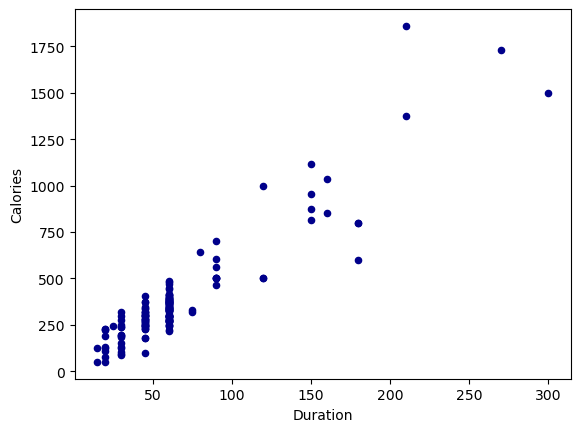

In [22]:
#Using pandas create a scatter plot for the two columns (Duration and Calories).
df.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

In [23]:
#1.Titanic dataset
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [24]:
#2.Glass Dataset
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
#visualization 1 of Glass Dataset
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [26]:
#visualization 2 of Glass Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

NameError: name 'matrix' is not defined

In [27]:
#Naïve Bayes method of Glass Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 55.81%

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [28]:
#Linear SVM method of Glass Dataset
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
#To avoid warnings
warnings.filterwarnings("ignore")

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)



Accuracy Score: 51.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.51        43
   macro avg       0.36      0.46      0.38        43
weighted avg       0.34      0.51      0.38        43

